In [67]:
import pandas as pd
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import re
import time
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support import expected_conditions as EC
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [68]:
df=pd.read_csv('merged_cleaned.csv',thousands=',')

In [69]:
df=df.drop(columns=['raised','goal'])

In [70]:
df.head(3)

,Unnamed: 0,link,location,summary,title,tag,created_date,goal_int,raised_int
0,0,https://www.gofundme.com/steven-crowder-live-a...,"Dallas, TX",SMU College Republicans is bringing comedian S...,Steven Crowder Live at SMU!,rep,"March 7, 2018",6500.0,2710.0
1,1,https://www.gofundme.com/reopen-a-nc-republica...,"Brookline, MA",NOTE: We reached our goal and then some in les...,Dems help reopen a NC Repub office,rep,"October 16, 2016",10000.0,12857.0
2,3,https://www.gofundme.com/mugop,"Columbia, MO",We are the University of Missouri - College Re...,Mizzou College Republicans,rep,"November 17, 2015",5000.0,3649.0


In [71]:
#converting dates
df['date']=pd.to_datetime(df.created_date,infer_datetime_format=True)

In [74]:

df = df.set_index('date')

In [75]:
#why does this only work when i do the set_index cell first? why can't I do df.date.year?
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.weekday_name

In [78]:
df.head(3)

,Unnamed: 0,link,location,summary,title,tag,created_date,goal_int,raised_int,Year,Month,Weekday Name
date,,,,,,,,,,,,
2018-03-07,0,https://www.gofundme.com/steven-crowder-live-a...,"Dallas, TX",SMU College Republicans is bringing comedian S...,Steven Crowder Live at SMU!,rep,"March 7, 2018",6500.0,2710.0,2018,3,Wednesday
2016-10-16,1,https://www.gofundme.com/reopen-a-nc-republica...,"Brookline, MA",NOTE: We reached our goal and then some in les...,Dems help reopen a NC Repub office,rep,"October 16, 2016",10000.0,12857.0,2016,10,Sunday
2015-11-17,3,https://www.gofundme.com/mugop,"Columbia, MO",We are the University of Missouri - College Re...,Mizzou College Republicans,rep,"November 17, 2015",5000.0,3649.0,2015,11,Tuesday


# Aggregate Graphs


In [45]:
#using seaborn time series formatting
sns.set(rc={'figure.figsize':(11, 4)})

In [56]:
df['Weekday Name'] = pd.Categorical(df['Weekday Name'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

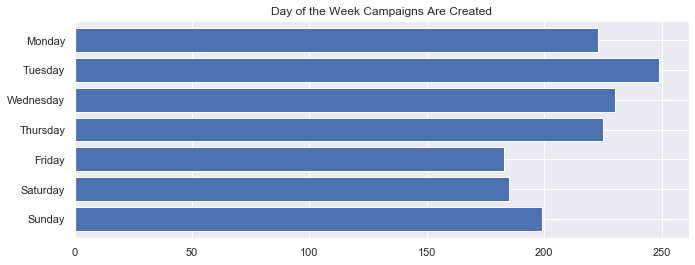

In [64]:
created_by_day = df['Weekday Name'].value_counts()
created_by_day = created_by_day.sort_index(ascending=False)
created_by_day.plot(kind='barh',width=0.8,title= "Day of the Week Campaigns Are Created")

In [87]:
rep_year=df[df['tag']=='rep'].Year.value_counts().rename_axis('Year').reset_index(name='rep_counts')
dem_year =df[df['tag']=='dem'].Year.value_counts().rename_axis('Year').reset_index(name='dem_counts')

In [89]:
dem_year

,Year,dem_counts
0,2019,218
1,2018,202
2,2016,133
3,2017,35
4,2015,18
5,2014,8
6,2013,2
7,2012,2


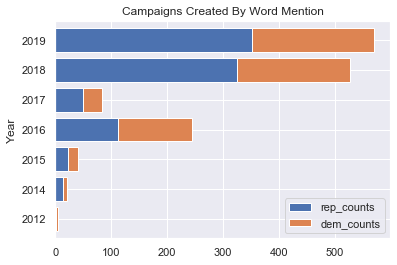

In [95]:
year_df=rep_year.merge(dem_year, left_on='Year',right_on='Year')
year_df.sort_values('Year').set_index('Year').plot(kind='barh',stacked=True,width=0.8,title='Campaigns Created By Word Mention')

In [96]:
df.head(3)

,Unnamed: 0,link,location,summary,title,tag,created_date,goal_int,raised_int,Year,Month,Weekday Name
date,,,,,,,,,,,,
2018-03-07,0,https://www.gofundme.com/steven-crowder-live-a...,"Dallas, TX",SMU College Republicans is bringing comedian S...,Steven Crowder Live at SMU!,rep,"March 7, 2018",6500.0,2710.0,2018,3,Wednesday
2016-10-16,1,https://www.gofundme.com/reopen-a-nc-republica...,"Brookline, MA",NOTE: We reached our goal and then some in les...,Dems help reopen a NC Repub office,rep,"October 16, 2016",10000.0,12857.0,2016,10,Sunday
2015-11-17,3,https://www.gofundme.com/mugop,"Columbia, MO",We are the University of Missouri - College Re...,Mizzou College Republicans,rep,"November 17, 2015",5000.0,3649.0,2015,11,Tuesday


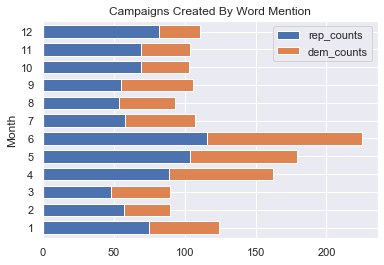

In [100]:
rep_Month=df[df['tag']=='rep'].Month.value_counts().rename_axis('Month').reset_index(name='rep_counts')
dem_Month =df[df['tag']=='dem'].Month.value_counts().rename_axis('Month').reset_index(name='dem_counts')
Month_df=rep_Month.merge(dem_Month, left_on='Month',right_on='Month')
Month_df.sort_values('Month').set_index('Month').plot(kind='barh',stacked=True,width=0.7,title='Campaigns Created By Word Mention')

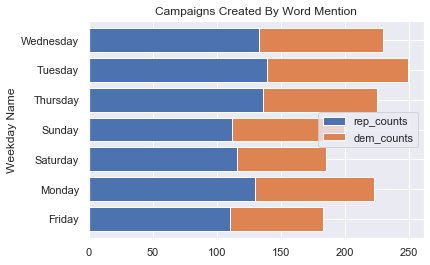

In [102]:
rep_Weekday_Name=df[df['tag']=='rep']['Weekday Name'].value_counts().rename_axis('Weekday Name').reset_index(name='rep_counts')
dem_Weekday_Name =df[df['tag']=='dem']['Weekday Name'].value_counts().rename_axis('Weekday Name').reset_index(name='dem_counts')
Weekday_Name_df=rep_Weekday_Name.merge(dem_Weekday_Name, left_on='Weekday Name',right_on='Weekday Name')
Weekday_Name_df.sort_values('Weekday Name').set_index('Weekday Name').plot(kind='barh',stacked=True,width=0.8,title='Campaigns Created By Word Mention')

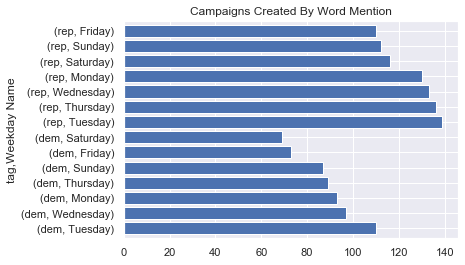

In [105]:
#playing with groupbys 
df.groupby('tag')['Weekday Name'].value_counts().plot(kind='barh',stacked=True,width=0.8,title='Campaigns Created By Word Mention')

In [106]:
sns.barplot(data=df.groupby('tag')['Weekday Name'].value_counts(),hue='tag',stacked=True)

ValueError: Cannot use `hue` without `x` or `y`